# Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

# Read data

In [2]:
df_data = pd.read_csv("adult.csv")

In [3]:
df_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Check data

In [4]:
df_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df_data["native-country"].value_counts().index[0]

' United-States'

In [6]:
df_data["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [7]:
df_data = df_data.drop(['fnlwgt', 'educational-num'], axis = 1) 

In [8]:
col_names = df_data.columns

# Check Nulls and replace values

In [9]:
for c in col_names: 
    df_data = df_data.replace("?", np.NaN) 
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Encoding

In [10]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
               'race', 'gender', 'native-country', 'income']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}, 'education': {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, ' Transport-moving': 14}, 'relationship': {' Husband': 0, ' Not-in-family': 1, ' 

# Exploratory Data Analysis

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

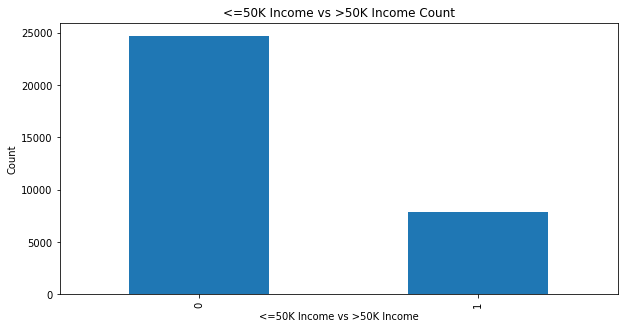

In [11]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.income.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

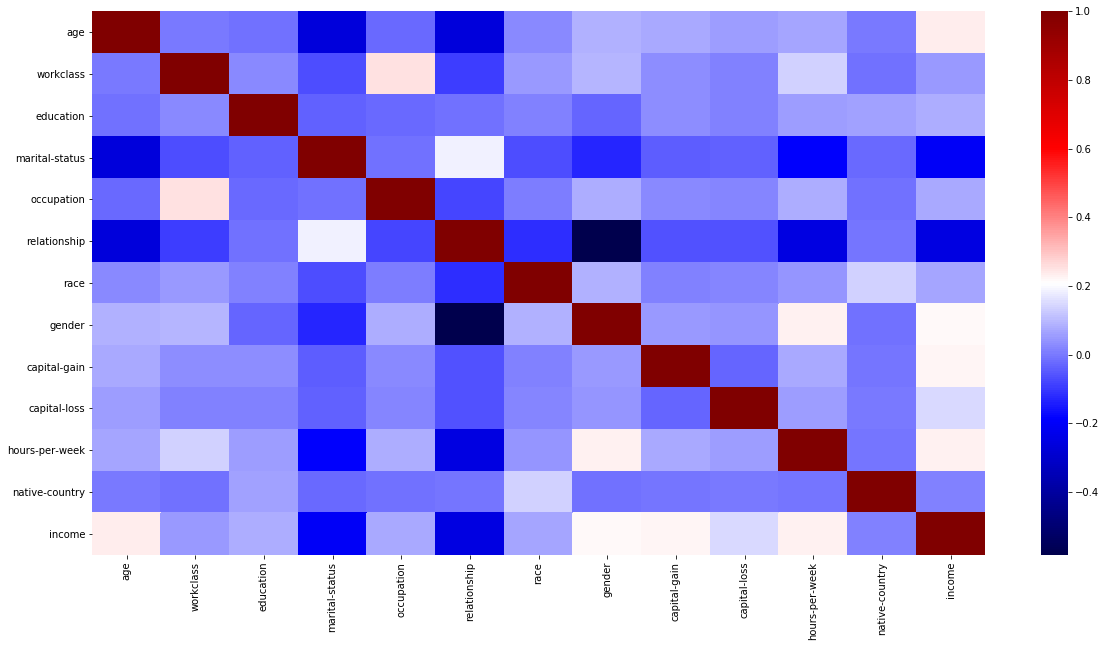

In [12]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

# Label Data

In [13]:
X = df_data.drop('income', axis = 1) 
Y = df_data['income']

# Cluster data using Dimensionality reduction

In [14]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

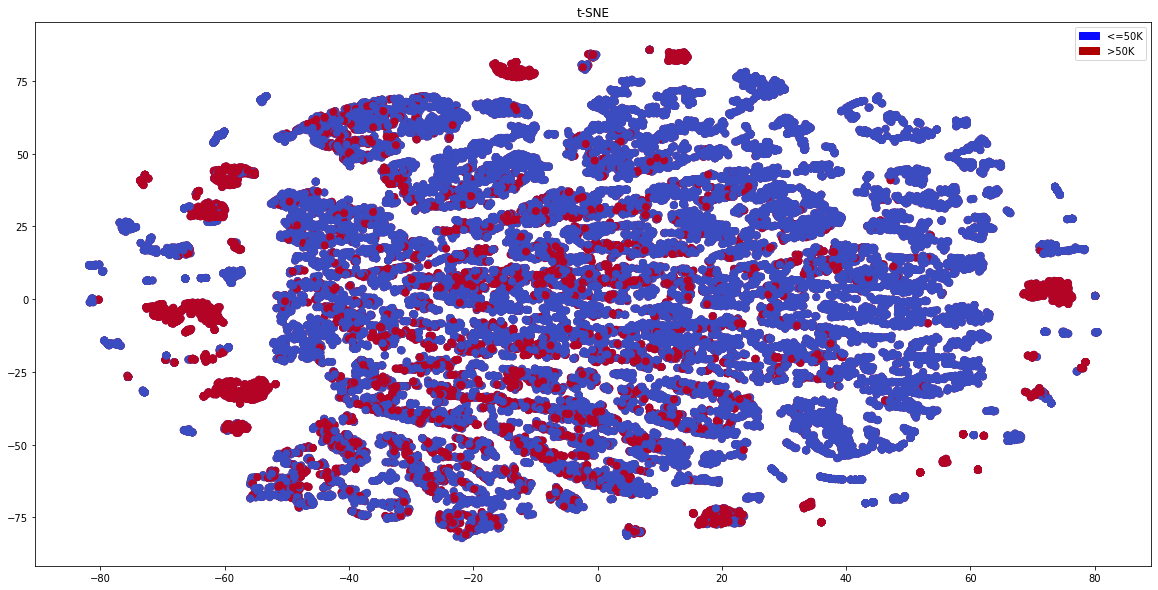

In [15]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

# Split into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

# Train & Test Data using XGBoost Classifier

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=0)
xgb.fit(X_train, y_train)
ypred = xgb.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
xgb_fp, xgb_tp, xgb_threshold = roc_curve(y_test, ypred)
print("Threshold:", xgb_threshold)

[[7066  362]
 [ 940 1401]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7428
           1       0.79      0.60      0.68      2341

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Accuracy Score: 0.8667212611321528
Recall Score: 0.5984621956428876
Precision Score: 0.7946681792399319
ROC AUC Score:  0.7748638388015192
Threshold: [2 1 0]


# Get most important features and their contribution in model

### Using Xgboost importance_type = "weight"

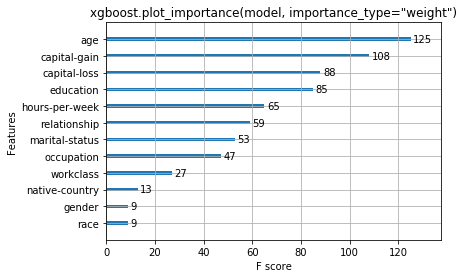

In [18]:
import xgboost
xgboost.plot_importance(xgb, importance_type="weight")
plt.title('xgboost.plot_importance(model, importance_type="weight")')
plt.show()

### Using Xgboost importance_type = "gain"

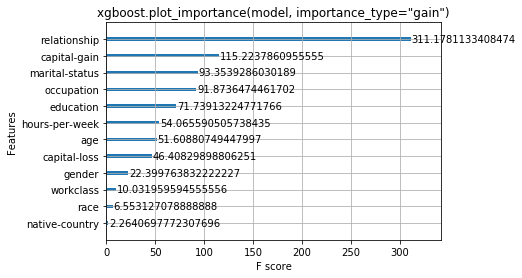

In [19]:
import xgboost
xgboost.plot_importance(xgb, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()

### Using Xgboost importance_type = "cover"

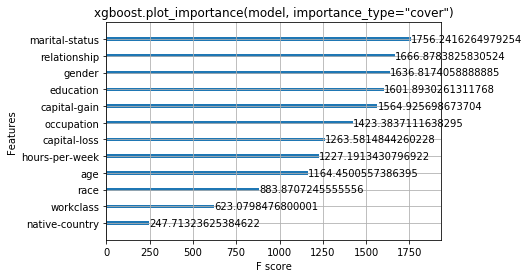

In [20]:
import xgboost
xgboost.plot_importance(xgb, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

In [21]:
!pip install shap

In [22]:
import shap

In [23]:
shap.initjs()

In [24]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

## Global Interpretability

### SHAP Global Summary Bar Plot

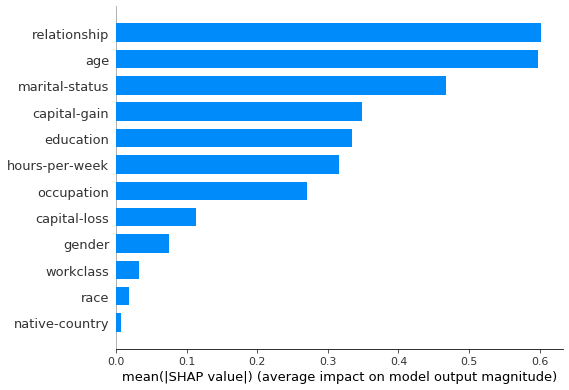

In [25]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

### SHAP Global Summary Plot

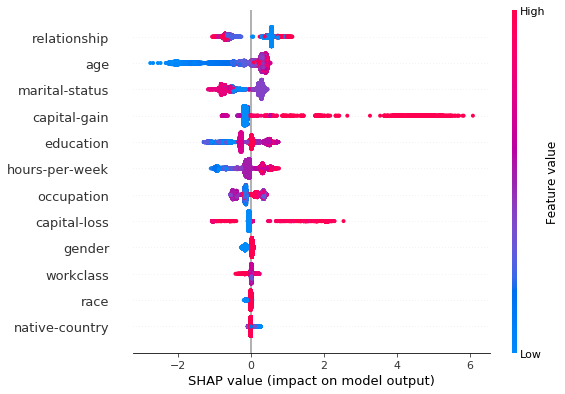

In [26]:
shap.summary_plot(shap_values, X_train)

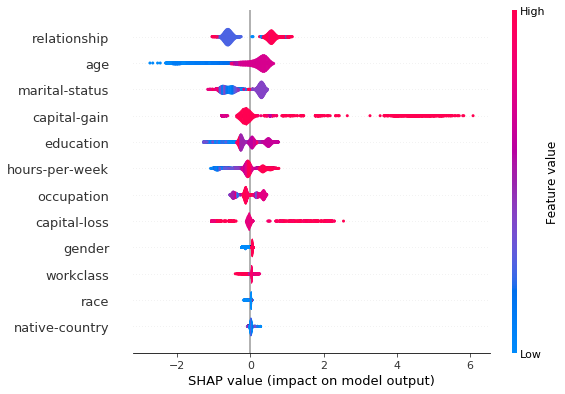

In [27]:
shap.summary_plot(shap_values, X_train, plot_type='violin')

### SHAP Global Dependence Plots

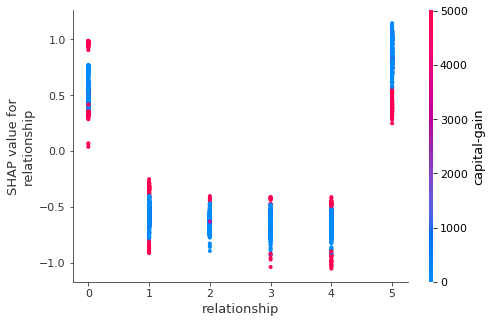

In [28]:
shap.dependence_plot("relationship", shap_values, X_train)

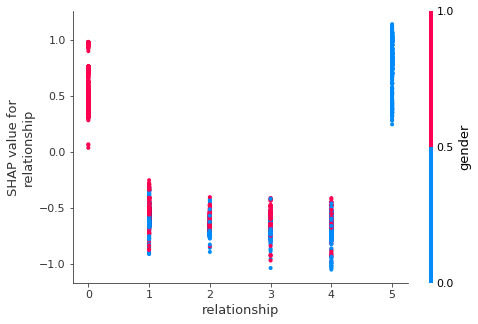

In [29]:
shap.dependence_plot("relationship", shap_values, X_train, interaction_index="gender")

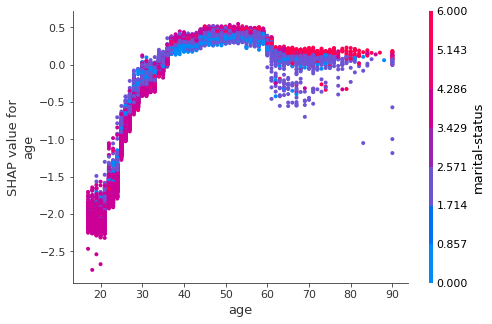

In [30]:
shap.dependence_plot("age", shap_values, X_train)

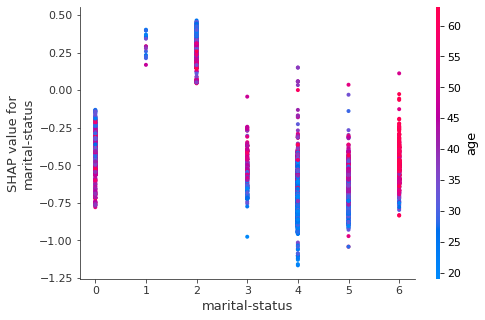

In [31]:
shap.dependence_plot("marital-status", shap_values, X_train, interaction_index="age")

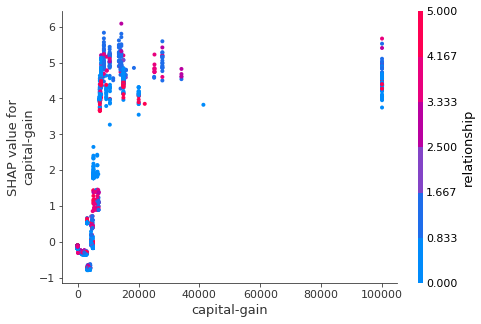

In [32]:
shap.dependence_plot("capital-gain", shap_values, X_train)

### SHAP Global Interaction summary plot

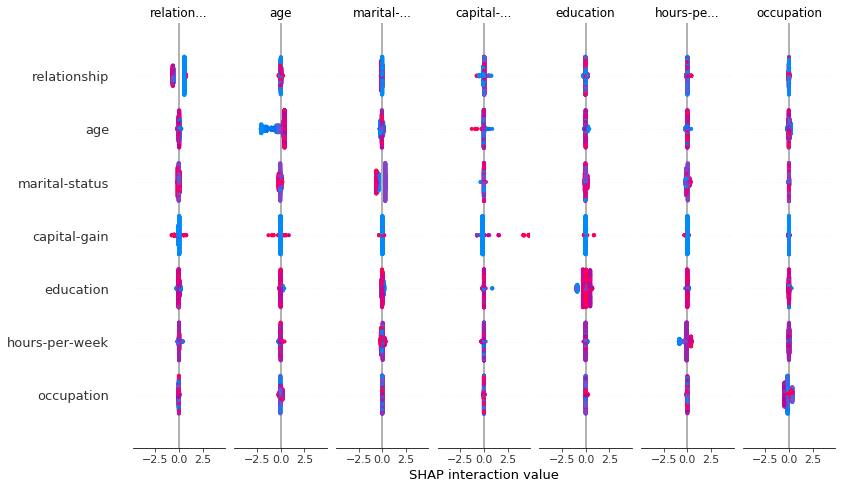

In [33]:
shap_interaction_values = explainer.shap_interaction_values(X_train.iloc[:1000,:])
shap.summary_plot(shap_interaction_values, X_train.iloc[:1000,:])

### SHAP Global Force Plot

In [34]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train.iloc[:1000,:])

## Local Interpretability

### SHAP Local Bar Plot

In [35]:
shap_test = shap.Explainer(xgb, X_test)(X_test)

100%|===================| 9751/9769 [00:24<00:00]        

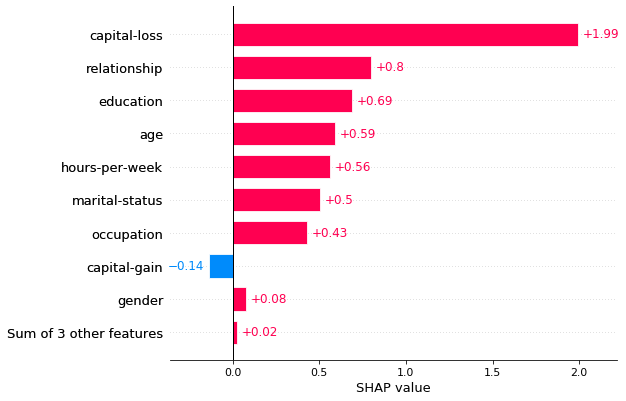

In [36]:
shap.plots.bar(shap_test[9])

### SHAP Local Waterfall Plot

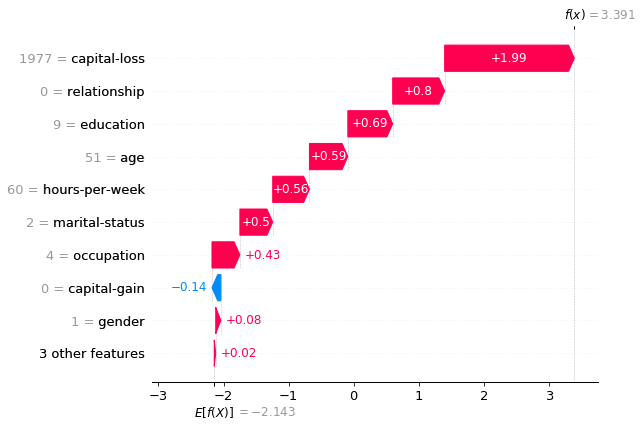

In [37]:
shap.plots.waterfall(shap_test[9])

### SHAP Local Force Plot

In [38]:
shap.force_plot(explainer.expected_value, shap_test.values[9,:], X_test.iloc[9,:])